In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import set_config

In [24]:
#import the bank-full.csv file
df = pd.read_csv('data/bank-full.csv', delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [25]:
#We check the data to see if we have any quality issues
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB



Logistic Regression Results:
Confusion Matrix:
[[7793  159]
 [ 854  237]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.60      0.22      0.32      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.60      0.63      9043
weighted avg       0.86      0.89      0.86      9043



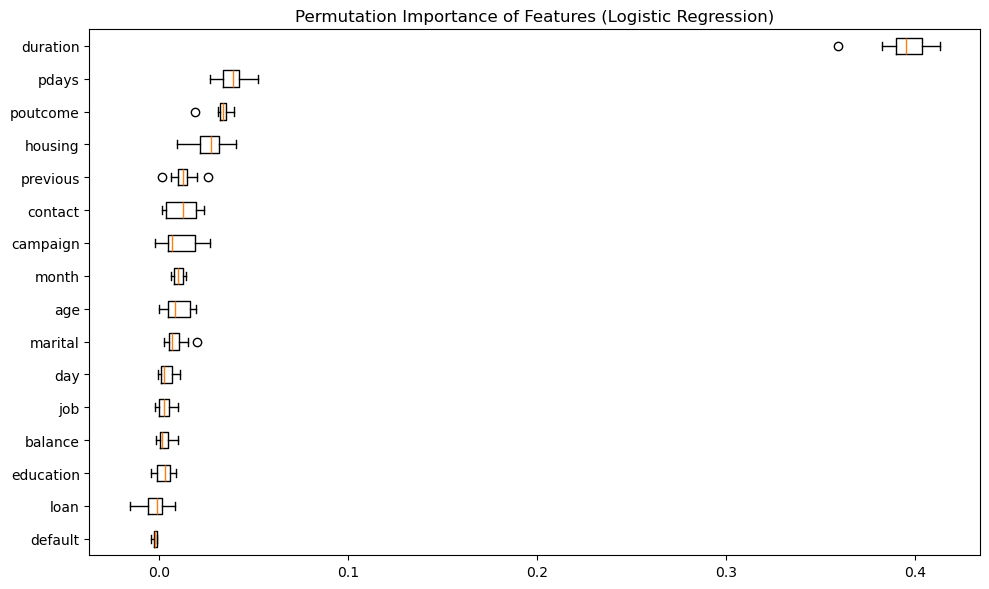


K-Nearest Neighbors Results:
Confusion Matrix:
[[7694  258]
 [ 726  365]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.59      0.33      0.43      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.65      0.68      9043
weighted avg       0.87      0.89      0.88      9043



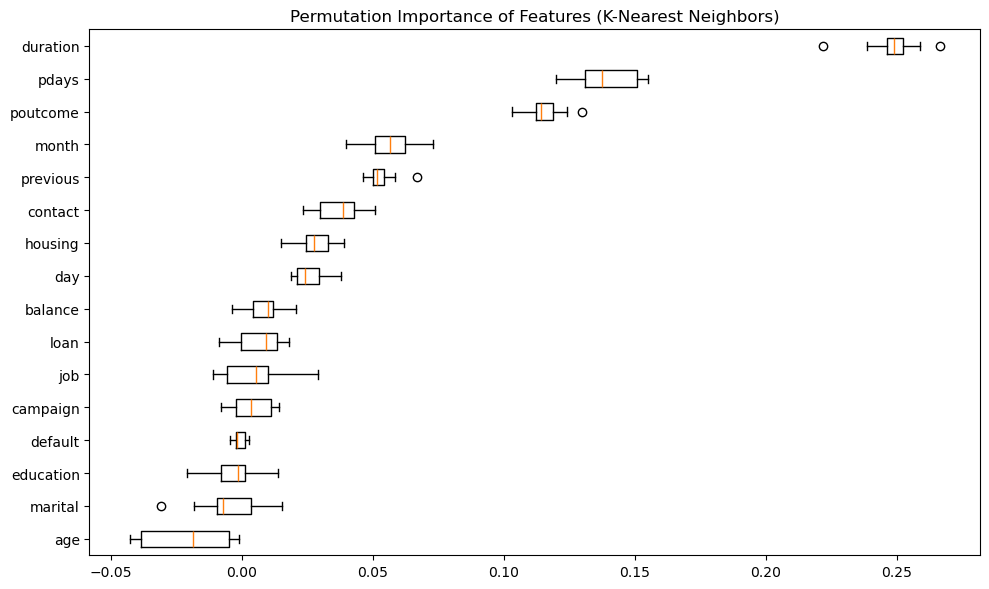


Decision Tree Results:
Confusion Matrix:
[[7363  589]
 [ 562  529]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.47      0.48      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.71      0.70      9043
weighted avg       0.87      0.87      0.87      9043



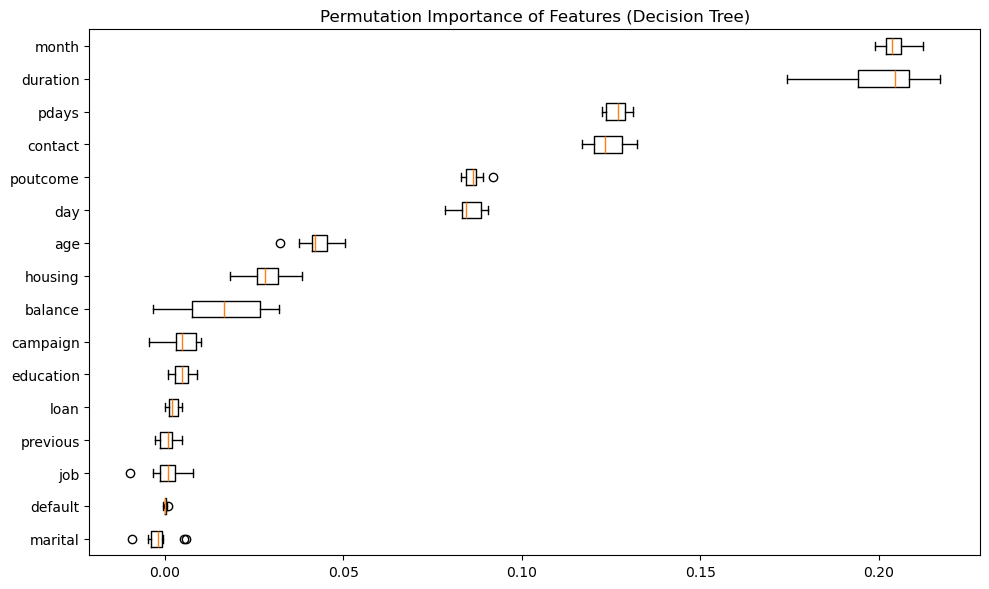


Support Vector Machine Results:
Confusion Matrix:
[[7799  153]
 [ 784  307]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.67      0.28      0.40      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.63      0.67      9043
weighted avg       0.88      0.90      0.88      9043



In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Encoding categorical variables
le = LabelEncoder()
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Splitting features and target
X = df.drop('y', axis=1)
y = df['y']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Save feature names
feature_names = X.columns.tolist()
# Function to print confusion matrix and classification report
def print_results(y_true, y_pred, model_name):
    print(f"\n{model_name} Results:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    

# Function to calculate and plot permutation importance
def plot_permutation_importance(model, X, y, feature_names, model_name):
    
    result = permutation_importance(model, X, y, n_repeats=10, random_state=42, scoring='precision')
    sorted_idx = result.importances_mean.argsort()
    
    plt.figure(figsize=(10, 6))
    plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=[feature_names[i] for i in sorted_idx])
    plt.title(f"Permutation Importance of Features ({model_name})")
    plt.tight_layout()
    plt.show()


# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
print_results(y_test, lr_pred, "Logistic Regression")
plot_permutation_importance(lr_model, X_test_scaled, y_test, feature_names, "Logistic Regression")

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
print_results(y_test, knn_pred, "K-Nearest Neighbors")
plot_permutation_importance(knn_model, X_test_scaled, y_test, feature_names, "K-Nearest Neighbors")

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)
print_results(y_test, dt_pred, "Decision Tree")
plot_permutation_importance(dt_model, X_test_scaled, y_test, feature_names, "Decision Tree")

# Support Vector Machine
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
print_results(y_test, svm_pred, "Support Vector Machine")
plot_permutation_importance(svm_model, X_test_scaled, y_test, feature_names, "Support Vector Machine")